In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('notebook')

In [3]:
import adr

In [4]:
puntos_pilar = pd.read_csv('puntos_pilar.csv')
barras_pilar = pd.read_csv('barras_pilar.csv')
ps = puntos_pilar.to_numpy()
bs = barras_pilar.to_numpy()

In [5]:
coordenadas = {}
for i, p in enumerate(ps):
    coordenadas[i] = tuple(p)

In [6]:
restr = {1: (1, 1, 1), 2: (1, 1, 1), 3: (1, 1, 1), 4: (1, 1, 1)} # Nº de nudo y restricciones en X, Y, Z
cargas = {3: (0, -400e3, 0), 4:(800e3, -400e3, 0)} # No está correcto aún

In [7]:
freq = 15.0 # (Hz) Frecuencia de vibración de las cargas (solo viento)
m1 = adr.Material(7850, 200e9) # material

In [8]:
## Secciones transversales
s1 = adr.SeccionTransversal(2550*1e-6) # Cordón superior e inferior
s2 = adr.SeccionTransversal(4936.8*1e-6) # Cordones zona de refuerzo y pilar
s3 = adr.SeccionTransversal(693.6*1e-6) # Diagonal vigas
s4 = adr.SeccionTransversal(940.44*1e-6) # Diagonal vigas zona de refuerzo
s5 = adr.SeccionTransversal(7486.8*1e-6) # Vertical conexión con zona de refuerzo
s6 = adr.SeccionTransversal(2*1270*1e-6) # Planchuela horizontal
s7 = adr.SeccionTransversal(1270*1e-6) # Planchuela diagonal

secciones = [s1, s2, s3, s4, s5, s6, s7]

In [9]:
elementos = []
for i, b in enumerate(bs):
    Ni, Nf, m, s = tuple(b)
    elementos.append([Ni, Nf, m1, secciones[s-1]])

In [10]:
propiedades = adr.config(coordenadas, restr, cargas, elementos)

In [11]:
nudos = propiedades['Nudos']
barras = propiedades['Barras']

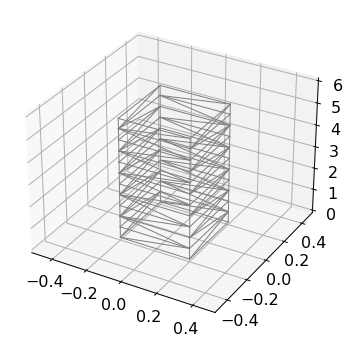

In [12]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_aspect('auto')
ax.set_xlim3d(-.5,.5)
ax.set_ylim3d(-.5,.5)
ax.set_zlim3d(0, 6)
for barra in barras:
    barra.dibuja3D(ax, espesor_area = False)
plt.savefig('elpu.png', dpi=500)